In [1]:
import pandas as pd
import config_prod as config
#import json
from datetime import date, timedelta
import phood_api
import rawlist

In [2]:
raw = pd.DataFrame(rawlist.masterlist) 

In [3]:
raw

,dateProduced,id,itemName,itemType,clientId,loggedTime,meal,actionTaken,actionReason,quantity,...,unit,station,employeeName,imageId,locationId,Location,Served,Saved,Sold,Shrink
0,2019-09-30,43120,Spring Mix,Menu Item,46000063050,2019-10-01T06:18:52.000Z,Breakfast,Served,Start,6.45954,...,Lbs,SB,None,None,51,Dedham,4.51954,0.0,4.51954,0.00000
1,2019-09-30,43122,Romaine Lettuce,Menu Item,46000055863,2019-10-01T06:19:06.000Z,Breakfast,Served,Start,6.45954,...,Lbs,SB,None,None,51,Dedham,4.51954,0.0,4.51954,0.00000
2,2019-09-30,43123,Romaine Lettuce,Menu Item,46000055863,2019-10-01T06:19:20.000Z,Breakfast,Served,Start,6.34931,...,Lbs,SB,None,None,51,Dedham,4.40931,0.0,4.40931,0.00000
3,2019-09-30,43124,Baby Spinach,Menu Item,46000055923,2019-10-01T06:19:35.000Z,Breakfast,Served,Start,6.76819,...,Lbs,SB,None,None,51,Dedham,4.82819,0.0,4.82819,0.00000
4,2019-09-30,43194,Plantains,Menu Item,46000001661,2019-10-01T07:06:17.000Z,Breakfast,Served,Start,6.74615,...,Lbs,HB,None,None,51,Dedham,4.80615,0.0,4.80615,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59389,2020-02-01,103082,Tomato Olive Chicken,Menu Item,46000064980,2020-01-05T21:18:01.000Z,Breakfast,Discarded,Over Produced,9.81057,...,Lbs,HB,None,b26b5640302a11eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-7.01057,7.01057
59390,2020-02-01,103083,Macaroni & Cheese,Menu Item,46000060414,2020-01-05T21:18:40.000Z,Breakfast,Discarded,Over Produced,4.03446,...,Lbs,HB,None,c8a270b0302a11eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-3.08446,3.08446
59391,2020-02-01,103084,Waffle Fries,Menu Item,46000064878,2020-01-05T21:19:04.000Z,Breakfast,Discarded,Over Produced,3.08647,...,Lbs,HB,None,d76a77a0302a11ea8b59c7cbcef30b8c,55,Cranston,0.00000,0.0,-1.18647,1.18647
59392,2020-02-01,103087,White Quinoa,Menu Item,46000055911,2020-01-05T21:23:11.000Z,Breakfast,Discarded,Over Produced,9.36965,...,Lbs,HB,None,6b01d2b0302b11ea8b59c7cbcef30b8c,55,Cranston,0.00000,0.0,-7.46965,7.46965


In [4]:
rawfile=raw

In [5]:
raw.columns = ['Date_Produced', 'Log_ID', 'Item_Name', 'Item_Type', 'PLU', 'Logged_Time', 'Meal', 'Action_Taken', 'Action_Reason', 'Quantity', 'Pan_ID', 'Pan_Weight', 'Unit', 'Station', 'Employee_Name','imageId', 'Location_ID','Location', 'Served','Saved','Sold','Shrink']

In [6]:
import pandas_profiling

## Remove Unit, Meal, Item Type, Employee Name columns

In [7]:
raw = raw.drop(columns=['Unit','Meal','Item_Type','Employee_Name'])

In [8]:
raw['Date_Produced'] = pd.to_datetime(raw['Date_Produced'])
raw['Logged_Time'] = pd.to_datetime(raw['Logged_Time'])

In [9]:
raw['Logged_Date'] = raw['Logged_Time'].dt.date
raw['Logged_Time'] = raw['Logged_Time'].dt.time

In [10]:
raw['Actual_Weight'] = raw['Quantity'] - raw['Pan_Weight']

In [11]:
rawpan = raw

In [12]:
raw = raw.drop(columns=['Log_ID','Date_Produced','Logged_Time','Action_Taken','Action_Reason','Pan_ID','Pan_Weight'])

In [13]:
file = raw.groupby(['Location_ID','Station','Logged_Date','PLU','Item_Name','Location'],as_index=False).sum()
#file

In [14]:
file = file.reindex(columns = ['Logged_Date', 'Station', 'PLU', 'Item_Name', 'Served','Saved','Shrink','Sold','Quantity','Actual_Weight','Location_ID','Location'])


In [15]:
negativeweights = file[(file.Served < 0) | (file.Saved < 0) | (file.Shrink < 0)]

In [16]:
#negativeweights

In [17]:
file = file[(file['Served'] >= 0) & (file['Saved'] >= 0) & (file['Shrink'] >= 0) & (file['Sold'] >=0)].reset_index(drop=True) 
#file


In [18]:
file0 = file.drop(columns=['Quantity','Actual_Weight'])
#file0

In [19]:
file1 = file[file['Location_ID']==51]
file2 = file[file['Location_ID']==52]
file3 = file[file['Location_ID']==53]
file4 = file[file['Location_ID']==54]
file5 = file[file['Location_ID']==55]
file0 = file0.drop(columns=['Location_ID'])
file1 = file1.drop(columns=['Location_ID'])
file2 = file2.drop(columns=['Location_ID'])
file3 = file3.drop(columns=['Location_ID'])
file4 = file4.drop(columns=['Location_ID'])
file5 = file5.drop(columns=['Location_ID'])

#file1

## Most sold item across all stores ranked by their sold quantity

In [20]:
ans = file0.groupby(['PLU','Item_Name','Location'])['Sold'].sum().sort_values( ascending=False).reset_index()
ans.head(20)


,PLU,Item_Name,Location,Sold
0,46000007582,Chicken Tenders,Dedham,4487.097860
1,46000064443,Mom's Chicken Soup,Dedham,3527.614450
2,46000063709,Buffalo Wings,Dedham,3119.723140
3,46000060414,Macaroni & Cheese,West hartford,3017.546978
4,46000007582,Chicken Tenders,West hartford,2861.398566
5,46000016508,Moms Chicken Soup,Hingham,2787.100213
6,46000016511,Nana's Chicken Noodle Soup,Dedham,2706.299630
7,46000060414,Macaroni & Cheese,Dedham,2664.697200
8,46000008373,Teriyaki Wings,Dedham,2526.501640
9,46000016511,Nanas Chicken Noodle Soup,Hingham,2519.360769


## Most sold Item of WholeFoods Market

In [41]:
ans = file0.groupby(['PLU','Item_Name'])['Sold'].sum().sort_values( ascending=False)
ans.head(10)

PLU          Item_Name                 
46000060414  Macaroni & Cheese             11520.225631
46000007582  Chicken Tenders                9151.696296
46000057474  Mashed Potatoes                6904.867068
46000064443  Mom's Chicken Soup             5457.368970
46000016511  Nana's Chicken Noodle Soup     4668.705290
46000016509  New England Clam Chowder       4646.419917
46000015070  Chicken Tenders                4323.474592
46000018499  Lentil Dal & Spinach Soup      4225.531270
46000025411  Beef Cavatappi Chop Suey       4119.086510
46000063709  Buffalo Wings                  4002.434610
Name: Sold, dtype: float64

## Total pounds of shrink generated across WFM

In [42]:
ans = file0['Shrink'].sum()
ans

22991.3308495

## Total pounds of item sold generated across WFM

In [43]:
ans = file0['Sold'].sum()
ans

178836.49957790002

## Total pounds of item served generated across WFM

In [44]:
ans = file0['Served'].sum()
ans

209287.50178239998

## Total pounds of item stored so far to reuse next day across WFM

In [45]:
ans = file0['Saved'].sum()
ans

7459.671354999999

## Track total weight since start date

In [71]:
ans = raw['Actual_Weight'].sum()
ans

268999.46414309996

## Average number of items processed daily across all 5 stores

In [46]:
ans = file.groupby(['Location','Logged_Date'], as_index = True)['Item_Name'].nunique().to_frame('UniqueItems')
ans

UniqueItems
Location Logged_Date             
Cranston 2019-10-01           112
         2019-10-02           119
         2019-10-03           110
         2019-10-04           109
         2019-10-05           100
...                           ...
Westford 2019-12-28            13
         2019-12-29            28
         2019-12-30            27
         2019-12-31            24
         2020-01-01            24

[447 rows x 1 columns]

In [47]:
ans = file.groupby(['Location','Item_Name'])['Item_Name'].count().to_frame('count').sort_values(['Location', 'count'], ascending=False)
#ans.groupby(['Location','Item_Name'])['Item_Name'].count
ans

count
Location Item_Name                                             
Westford Macaroni & Cheese                                   88
         Mashed Potatoes                                     83
         Scrambled Eggs                                      82
         Sautéed Peppers & Onions                            76
         SHEPHERDS PIE BEEF HB                               75
...                                                         ...
Cranston Pita Bread                                           1
         Potatoes, Patates Psites HB NA                       1
         SANDWICH BREAKFAST EGG CHEESE ENGLISH MUFFIN HC      1
         SANDWICH BREAKFAST HAM EGG CHEESE HB                 1
         Sausage Peppers and Onions                           1

[1097 rows x 1 columns]

## Average Shrink generated each day at each Store

In [48]:
ans = file0.groupby(['Location','Logged_Date'])['Shrink'].sum()
ans.to_frame().reset_index()
ans=ans.groupby('Location').mean()
ans.to_frame().reset_index()

,Location,Shrink
0,Cranston,43.611802
1,Dedham,34.835542
2,Hingham,68.963937
3,West hartford,56.197813
4,Westford,54.688754


## Amount of wrong logs entered at all WFM location

In [49]:
negativeweights
ans = negativeweights.groupby(['Location','Logged_Date'])['PLU'].size()
ans = ans.to_frame().reset_index()
ans= ans.rename(columns={"PLU": "WrongEntries"})
ans#.to_csv('Wronglogscount.csv')
ans

,Location,Logged_Date,WrongEntries
0,Cranston,2019-10-01,10
1,Cranston,2019-10-02,8
2,Cranston,2019-10-03,11
3,Cranston,2019-10-04,12
4,Cranston,2019-10-05,12
...,...,...,...
248,Westford,2019-12-26,2
249,Westford,2019-12-28,1
250,Westford,2019-12-30,3
251,Westford,2019-12-31,1


Text(0, 0.5, 'Invalid Entries')

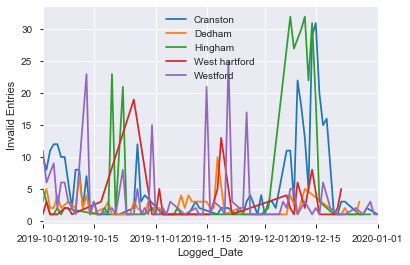

In [50]:

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ans.groupby('Location'):
    data.plot(x='Logged_Date', y='WrongEntries', ax=ax, label=key)
plt.ylabel('Invalid Entries')



In [51]:
rawpan = rawpan[rawpan.Pan_ID.notnull()]

In [52]:
rawpan1 = rawpan.groupby(['Pan_ID','PLU']).size().to_frame().reset_index()
rawpan1

,Pan_ID,PLU,0
0,100,26120900000,3
1,100,27661300000,7
2,100,27661900000,2
3,100,27848700000,2
4,100,27994400000,3
...,...,...,...
4877,253,46000018496,16
4878,253,46000018498,20
4879,253,46000018499,12
4880,253,46000030026,1


In [53]:
g=rawpan1.groupby('Pan_ID')['PLU'].value_counts()
g

Pan_ID  PLU        
100     26120900000    1
        27661300000    1
        27661900000    1
        27848700000    1
        27994400000    1
                      ..
253     46000018496    1
        46000018498    1
        46000018499    1
        46000030026    1
        9948248921     1
Name: PLU, Length: 4882, dtype: int64

In [54]:
#rawpan1.to_csv('panplu.csv')

In [55]:
rawfile['Logged_Time'] = pd.to_datetime(rawfile['Logged_Time'])
rawfile['Logged_Date'] = rawfile['Logged_Time'].dt.date
rawfile['Logged_Hour'] = rawfile['Logged_Time'].dt.hour
rawfile['Logged_Time'] = rawfile['Logged_Time'].dt.time


In [56]:
rawfile[rawfile['Action_Taken']=='Served'].max()

Date_Produced              2020-01-30
Log_ID                         101350
Item_Name        vegan sesame nuggets
Item_Type                   Menu Item
PLU                        9948248935
Logged_Time                  22:39:44
Meal                        Breakfast
Action_Taken                   Served
Action_Reason                   Start
Quantity                      31.8348
Pan_ID                            253
Pan_Weight                       6.65
Unit                              lbs
Employee_Name                     NaN
Location_ID                        55
Location                     Westford
Served                        29.7248
Saved                               0
Sold                          29.7248
Shrink                              0
Logged_Date                2020-01-01
Logged_Hour                        22
dtype: object

In [57]:
time = rawfile[['Logged_Date','Logged_Time','Action_Taken','Logged_Hour','Location']]
time['timetype'] = pd.cut(time['Logged_Hour'], bins=[0,6,12,16,20,24], include_lowest=True, labels=['early_morning','morning', 'afternoon', 'evening','night'])
x = time.groupby(['Location','Action_Taken','timetype']).size().to_frame('Count').reset_index()
ansd = x.groupby(['Location','Action_Taken'])['Count'].sum().to_frame('Sum').reset_index()
mergedStuff = pd.merge(x, ansd, on=['Location','Action_Taken'], how='inner')
mergedStuff['timetype'] = x['timetype']
#mergedStuff
mergedStuff['Entry_Percent'] = round(mergedStuff['Count'] / mergedStuff['Sum'] * 100, 2)
mergedStuff#.to_csv('timeframe.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Location,Action_Taken,timetype,Count,Sum,Entry_Percent
0,Cranston,Discarded,early_morning,151,3550,4.25
1,Cranston,Discarded,morning,1600,3550,45.07
2,Cranston,Discarded,afternoon,247,3550,6.96
3,Cranston,Discarded,evening,662,3550,18.65
4,Cranston,Discarded,night,890,3550,25.07
...,...,...,...,...,...,...
68,Westford,Served,early_morning,436,7274,5.99
69,Westford,Served,morning,3380,7274,46.47
70,Westford,Served,afternoon,1990,7274,27.36
71,Westford,Served,evening,1441,7274,19.81


In [58]:
x = mergedStuff[mergedStuff['Entry_Percent']>20].reset_index(drop=True)
b = x.sort_values(['Location','Action_Taken','Entry_Percent','timetype'],ascending=False).reset_index(drop=True)
#a = x.groupby(['Location','Action_Taken','timetype'])['Freq_Percent'].sum().to_frame().reset_index()
#a.dropna()
#b
c = b.groupby(['Location','Action_Taken'])['Entry_Percent'].sum().to_frame().reset_index()

d = b.groupby(['Location','Action_Taken'])['timetype'].apply(lambda x: '+'.join(x)).reset_index()
#print(b)
#print(c)
#print(type(b))
c['timeslot'] = d['timetype']
c

,Location,Action_Taken,Entry_Percent,timeslot
0,Cranston,Discarded,70.14,morning+night
1,Cranston,Saved,99.46,evening+night
2,Cranston,Served,84.40,morning+afternoon
3,Dedham,Discarded,84.28,night+morning+evening
4,Dedham,Saved,90.69,night
5,Dedham,Served,86.04,morning+afternoon
6,Hingham,Discarded,66.23,night+evening
7,Hingham,Saved,93.11,night
8,Hingham,Served,78.95,morning+afternoon
9,West hartford,Discarded,85.24,night+morning+evening


In [59]:
ans = negativeweights[negativeweights['Location']=='Westford']
ans = ans[ans['Logged_Date']== date(2019,11,15)]
ans

,Logged_Date,Station,PLU,Item_Name,Served,Saved,Shrink,Sold,Quantity,Actual_Weight,Location_ID,Location
11642,2019-11-15,HB,26488200000,Steel Cut Oatmeal,-0.680197,0.0,0.000000,-0.680197,0.859803,-0.680197,53,Westford
11643,2019-11-15,HB,46000004680,Chipotle Macaroni & Cheese,4.500670,0.0,-0.743100,5.243770,8.377570,3.757570,53,Westford
11645,2019-11-15,HB,46000008992,EGG BELL PEPPER HB,-1.429769,0.0,-1.540000,0.110231,0.110231,-2.969769,53,Westford
11646,2019-11-15,HB,46000008996,Tofu Breakfast Scramble,0.510300,0.0,-1.010891,1.521191,2.579409,-0.500591,53,Westford
11647,2019-11-15,HB,46000012679,Orange Chicken,5.385750,0.0,-2.132013,7.517763,9.413737,3.253737,53,Westford
11648,2019-11-15,HB,46000015070,Chicken Tenders,14.696320,0.0,-5.866931,20.563251,35.009389,8.829389,53,Westford
11649,2019-11-15,HB,46000018643,Black Beans & Brown Rice with Scallions,0.000000,0.0,-1.540000,1.540000,0.000000,-1.540000,53,Westford
11650,2019-11-15,HB,46000021881,Roasted Chicken with Paprika & Olives,0.000000,0.0,-1.868545,1.868545,2.601455,-1.868545,53,Westford
11653,2019-11-15,HB,46000028899,Balsamic Chicken Thighs,3.559150,0.0,-2.569697,6.128847,10.229453,0.989453,53,Westford
11654,2019-11-15,HB,46000028907,Mustard Ale Brussels Sprouts,0.000000,0.0,-1.540000,1.540000,0.000000,-1.540000,53,Westford


In [60]:
#pandas_profiling.ProfileReport(ans)

In [61]:
ans = rawfile[(rawfile['Location']=='Westford') & (rawfile['Logged_Date']== date(2019,11,15))]
ans#.to_csv('try.csv')
ans[ans['Shrink']== -1.54]

,Date_Produced,Log_ID,Item_Name,Item_Type,PLU,Logged_Time,Meal,Action_Taken,Action_Reason,Quantity,...,Employee_Name,imageId,Location_ID,Location,Served,Saved,Sold,Shrink,Logged_Date,Logged_Hour
30521,2019-11-15,77588,HUEVOS RANCHEROS HB,Menu Item,46000063826,11:59:36,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,11
30522,2019-11-15,77589,EGG BELL PEPPER HB,Menu Item,46000008992,11:59:55,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,11
30525,2019-11-15,77592,Tater Tots,Menu Item,46000064879,12:01:03,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,12
30533,2019-11-15,77629,Macaroni & Cheese,Menu Item,46000060414,13:14:10,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,13
30535,2019-11-15,77632,Green Beans with Roasted Garlic,Menu Item,46000064890,13:17:52,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,13
30542,2019-11-15,77654,Mustard Ale Brussels Sprouts,Menu Item,46000028907,14:01:52,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,14
30546,2019-11-15,77669,Buffalo Chicken Wings,Menu Item,46000063709,14:34:37,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,14
30549,2019-11-15,77683,Black Beans & Brown Rice with Scallions,Menu Item,46000018643,15:22:09,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,15
30550,2019-11-15,77703,Balsamic Chicken Thighs,Menu Item,46000028899,15:50:45,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,15
30552,2019-11-15,77705,Green Beans with Roasted Garlic,Menu Item,46000064890,16:06:27,Breakfast,Discarded,Over Produced,0.0,...,None,None,53,Westford,0.0,0.0,1.54,-1.54,2019-11-15,16


In [63]:
file0.head(5)

,Logged_Date,Station,PLU,Item_Name,Served,Saved,Shrink,Sold,Location
0,2019-10-01,HB,26747000000,Cajun Wedged Sweet Potatoes,13.91137,0.0,1.64545,12.26592,Dedham
1,2019-10-01,HB,46000001661,Plantains,4.80615,0.0,1.78307,3.02308,Dedham
2,2019-10-01,HB,46000005678,Chicken Cacciatore,22.88980,0.0,1.27601,21.61379,Dedham
3,2019-10-01,HB,46000007290,Curried Cauliflower,18.25448,0.0,2.74776,15.50672,Dedham
4,2019-10-01,HB,46000007582,Chicken Tenders,45.77823,0.0,6.93147,38.84676,Dedham


In [64]:
ans = rawfile.groupby(['Location', 'Logged_Date','Location']).size().to_frame('Size')
print(ans.to_string())

                                         Size
Location      Logged_Date Location           
Cranston      2019-10-01  Cranston        322
              2019-10-02  Cranston        303
              2019-10-03  Cranston        288
              2019-10-04  Cranston        302
              2019-10-05  Cranston        337
              2019-10-06  Cranston        317
              2019-10-07  Cranston        328
              2019-10-08  Cranston        339
              2019-10-09  Cranston        324
              2019-10-10  Cranston        318
              2019-10-11  Cranston        261
              2019-10-12  Cranston        296
              2019-10-13  Cranston        295
              2019-10-14  Cranston         93
              2019-10-15  Cranston         93
              2019-10-16  Cranston         99
              2019-10-17  Cranston         69
              2019-10-19  Cranston         54
              2019-10-20  Cranston        102
              2019-10-21  Cranston

In [65]:
raw

,Item_Name,PLU,Quantity,Station,imageId,Location_ID,Location,Served,Saved,Sold,Shrink,Logged_Date,Actual_Weight
0,Spring Mix,46000063050,6.45954,SB,None,51,Dedham,4.51954,0.0,4.51954,0.00000,2019-10-01,4.51954
1,Romaine Lettuce,46000055863,6.45954,SB,None,51,Dedham,4.51954,0.0,4.51954,0.00000,2019-10-01,4.51954
2,Romaine Lettuce,46000055863,6.34931,SB,None,51,Dedham,4.40931,0.0,4.40931,0.00000,2019-10-01,4.40931
3,Baby Spinach,46000055923,6.76819,SB,None,51,Dedham,4.82819,0.0,4.82819,0.00000,2019-10-01,4.82819
4,Plantains,46000001661,6.74615,HB,None,51,Dedham,4.80615,0.0,4.80615,0.00000,2019-10-01,4.80615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57700,Chipotle Lime Tofu,46000010140,2.79987,HB,7d4e30602cf411eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-1.84987,1.84987,2020-01-01,1.84987
57701,Cumin Sweet Potatoes,46000023452,1.87393,HB,7d4e30602cf411eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-0.92393,0.92393,2020-01-01,0.92393
57702,Queso Sauce,46000013629,2.68964,HB,7d4e30602cf411eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-1.73964,1.73964,2020-01-01,1.73964
57703,White Quinoa,46000055911,1.87393,HB,7d4e30602cf411eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-0.92393,0.92393,2020-01-01,0.92393


In [66]:
ans = raw.groupby(['PLU','Item_Name'])['Logged_Date'].min().to_frame('min').sort_values(['min'], ascending=False)
ans#.to_csv('min.csv')

,,min
PLU,Item_Name,
9948248927,ALPHABET SOUP,2019-12-30
46000029517,Smashed Butternut Squash with Mascarpone,2019-12-28
46000064386,RICE WHITE COOKED HB,2019-12-28
46000031321,SALAD TUNA CITRUS JICAMA SB,2019-12-28
46000055774,Cashews,2019-12-26
...,...,...
46000007600,EGG BAKED HB,2019-10-01
46000007609,Kale & Brussel Sprout Salad,2019-10-01
46000007685,Salmon Caesar Salad,2019-10-01


In [99]:
ans = raw[raw['Logged_Date']>= date(2019,12,1)]
ans = ans.groupby(['Location','Item_Name','PLU']).size().to_frame('Count').reset_index()
ans = ans[ans.Count <2].reset_index(drop = True)
ans#.to_csv('onlyonceused.csv')

,Location,Item_Name,PLU,Count
0,Cranston,Bacon Ranch Potato Salad,46000006049,1
1,Cranston,Balsamic Mushrooms,46000014318,1
2,Cranston,Black Eyed Pea Fritters Chef LMT HB CE,46000030014,1
3,Cranston,Broccoli Crunch,27074300000,1
4,Cranston,CV Broccoli,46000055751,1
...,...,...,...,...
173,Westford,Smashed Butternut Squash with Mascarpone,46000029517,1
174,Westford,Spinach Feta Orzo,46000003328,1
175,Westford,Thai Coconut Shrimp Soup,88063200321,1
176,Westford,Vegetable Fried Rice,46000022030,1


In [126]:
ans = raw[raw['Logged_Date']>= date(2019,12,1)]
ans = ans.groupby(['Location','PLU']).size().to_frame('Count').reset_index()
ans1 = ans.drop(columns=['Count'])
ans1

,Location,PLU
0,Cranston,26104100000
1,Cranston,26139600000
2,Cranston,26278000000
3,Cranston,26490600000
4,Cranston,26740400000
...,...,...
798,Westford,46000064891
799,Westford,46000064940
800,Westford,88063200321
801,Westford,9948248921


In [89]:
import phood_api
locationIdLUT = {
        'dedham': '51',
        'hingham': '52',
        'westford': '53',
        'westhartford': '54',
        'cranston': '55',
        }
    
locationPLUs = {}
locationStations = {}
locationItemInfo = {}
allplus = []
p = []
phoodServer = phood_api.PhoodAPI(config.base_url)
for loc in locationIdLUT.keys():
    res = phoodServer.login(loc, config.password).json()
    locationId = phoodServer.getLocationId()
    res = phoodServer.getPersistentItems()
    locationItemInfo[loc] = {}
    for i in list(res.json()):
        locationItemInfo[loc][i['clientId'].replace('-','')] = i
    locationAllPLUs = [i['clientId'] for i in list(res.json())]
    locationPLUs[loc] = set([i.replace('-','') for i in locationAllPLUs])
    locationStations[loc] = set([i['station'] for i in list(res.json())])
    #print(locationAllPLUs)
    print(loc)
    print(len(locationAllPLUs))
    print(len(locationPLUs[loc]))
    allplus.extend(locationAllPLUs)
    '''for val in locationAllPLUs:
        thisdict = {"PLU": str(val),"Location": str(loc)}'''
    for i in list(res.json()):
        #print(i)
        p.append(i)
    



dedham
241
239
hingham
384
375
westford
422
403
westhartford
316
309
cranston
282
254


In [91]:
x = pd.DataFrame(p)

In [98]:
x

,id,name,clientId,meal,dayOfTheWeek,station,itemCost,locationId
0,10852,Bacon,46000060011,N/A,N/A,Hot Bar - BREAKFAST,0.0,51
1,10859,Sausage Patties,46000065097,N/A,N/A,Hot Bar - BREAKFAST,0.0,51
2,10866,Turkey Bacon,46000065008,N/A,N/A,Hot Bar - BREAKFAST,0.0,51
3,10873,Blueberry Lemon Pancakes,46000063819,N/A,N/A,Hot Bar - BREAKFAST,0.0,51
4,10880,Roasted Sweet Potatoes,46000064784,N/A,N/A,Hot Bar - BREAKFAST,0.0,51
...,...,...,...,...,...,...,...,...
1640,49831,Tofu Taco Crumble,46000030061,N/A,N/A,Hot Bar - VEGAN LATIN,NaN,55
1641,49832,Vegan Bell Pepper Nachos,46000030063,N/A,N/A,Hot Bar - VEGAN LATIN,NaN,55
1642,49833,Sweet Potato Picadillo,46000030064,N/A,N/A,Hot Bar - VEGAN LATIN,NaN,55
1643,49834,"Zucchini, Sauteed with Poblano HB NA",46000019139,N/A,N/A,Hot Bar - VEGAN LATIN,NaN,55


In [105]:
x.loc[x.locationId == 51, 'Location'] = "Deedham"
x.loc[x.locationId == 52, 'Location'] = "Hingham"
x.loc[x.locationId == 53, 'Location'] = "Westford"
x.loc[x.locationId == 54, 'Location'] = "West Hartford"
x.loc[x.locationId == 55, 'Location'] = "Cranston"

In [127]:
ans = x.groupby(['Location','clientId']).size().to_frame('Count').reset_index()
ans = ans.rename(columns={"clientId": "PLU"})
ans = ans.drop(columns={'Count'})
ans

,Location,PLU
0,Cranston,24243800000
1,Cranston,24243900000
2,Cranston,26104100000
3,Cranston,26139600000
4,Cranston,26278000000
...,...,...
1575,Westford,9948248921
1576,Westford,9948248923
1577,Westford,9948248927
1578,Westford,9948248931


In [133]:
ansd = pd.concat([ans, ans1]).drop_duplicates(keep=False).reset_index(drop=True)
ansd#.to_csv('try.csv')

,Location,PLU
0,Cranston,24243800000
1,Cranston,24243900000
2,Cranston,26489600000
3,Cranston,26887100000
4,Cranston,27388900000
...,...,...
1356,West hartford,9948248557
1357,West hartford,9948248921
1358,West hartford,9948248923
1359,West hartford,9948248927
